In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
data = pd.read_csv('accidents.csv', header = None)

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,56a72710-563d-410e-a744-468d2421092e,"Forecaster, CAIC",2/20/2018 7:00,Known,Estimated,38.008880,-107.873070,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""Convex Slope""}"
1,6e872258-f60c-47bb-b6eb-484cc0fe3e89,"Forecaster, CAIC",12/19/2024 19:00,Estimated,Unknown,39.682316,-105.930845,f,f,t,...,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{}
2,22315e1b-b4cf-4de4-9c1b-9a3d124db2d4,"Forecaster, CAIC",1/22/2012 19:00,Known,Unknown,40.506490,-105.886230,f,f,t,...,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{}
3,4cc8fd48-c67f-40c3-963f-1c3bbed8676b,"Forecaster, CAIC",1/22/2012 7:00,Known,Unknown,39.886920,-105.760660,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50f496f8-21d1-4a6f-a250-8b7c821810c1,"Forecaster, CAIC",1/14/2018 19:00,Known,Unknown,38.689060,-106.355380,f,f,t,...,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{}


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 89 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       308 non-null    object 
 1   1       296 non-null    object 
 2   2       308 non-null    object 
 3   3       308 non-null    object 
 4   4       294 non-null    object 
 5   5       308 non-null    float64
 6   6       308 non-null    float64
 7   7       42 non-null     object 
 8   8       42 non-null     object 
 9   9       42 non-null     object 
 10  10      308 non-null    object 
 11  11      200 non-null    object 
 12  12      109 non-null    object 
 13  13      308 non-null    object 
 14  14      308 non-null    int64  
 15  15      199 non-null    object 
 16  16      213 non-null    object 
 17  17      308 non-null    object 
 18  18      20 non-null     float64
 19  19      256 non-null    object 
 20  20      285 non-null    object 
 21  21      12 non-null     object 
 22  22

In [21]:
#I used excel to identify the columns worth keeping, then converted their column letters into array positions
#I will keep these columns
cols_to_keep = [2, 5, 6, 19, 20, 30, 46]

avalanche_df = data[cols_to_keep]

#Now we should have the unique accident ID, date, latitude, longitude, avalanche type, aspect, elevation, and slope degree
avalanche_df.head()

,2,5,6,19,20,30,46
0,2/20/2018 7:00,38.008880,-107.873070,HS,N,11400.0,NaN
1,12/19/2024 19:00,39.682316,-105.930845,NaN,W,11600.0,NaN
2,1/22/2012 19:00,40.506490,-105.886230,NaN,NaN,NaN,NaN
3,1/22/2012 7:00,39.886920,-105.760660,NaN,N,10400.0,NaN
4,1/14/2018 19:00,38.689060,-106.355380,SS,NE,11200.0,35.0


In [22]:
#Now I'll name the columns that we want to keep
avalanche_df.columns = ['Date','Latitude','Longitude','Avalanche Type','Aspect','Elevation','Slope Degree']

In [23]:
#Lets check and see how it looks with the column names
avalanche_df.head()

,Date,Latitude,Longitude,Avalanche Type,Aspect,Elevation,Slope Degree
0,2/20/2018 7:00,38.008880,-107.873070,HS,N,11400.0,NaN
1,12/19/2024 19:00,39.682316,-105.930845,NaN,W,11600.0,NaN
2,1/22/2012 19:00,40.506490,-105.886230,NaN,NaN,NaN,NaN
3,1/22/2012 7:00,39.886920,-105.760660,NaN,N,10400.0,NaN
4,1/14/2018 19:00,38.689060,-106.355380,SS,NE,11200.0,35.0


In [29]:
#Out of curiosity lets see how many Avalanche Types (the Y of our model) we are missing
avalanche_df['Avalanche Type'].isna().sum()

52

In [31]:
#Lets compare that to how many non-nan values we have
avalanche_df['Avalanche Type'].count()

256

In [34]:
#And then the total length of the column
len(avalanche_df['Avalanche Type'])

308

<Axes: >

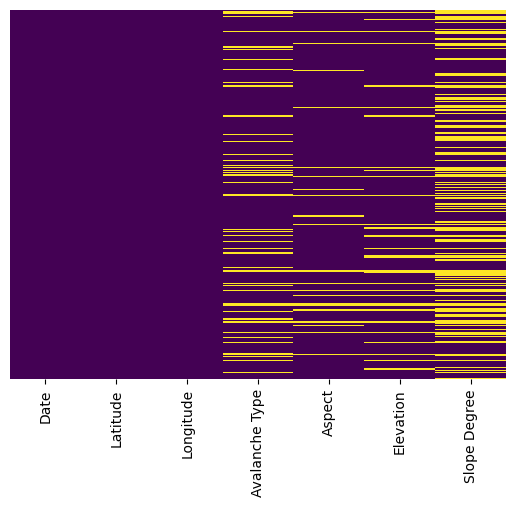

In [52]:
#I like to use this trick to visualize how much missing data we have. It looks like theres a lot of missing slope degree and some missing
#Data from other data types. Thankfully there are no missing dates, latitudes, or longitudes so I think we can feature engineer and fill these in
sns.heatmap(avalanche_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [ ]:
#I'm going to focus on getting elevation sorted out first. Let me get familiar with elevation

<Axes: ylabel='Elevation'>

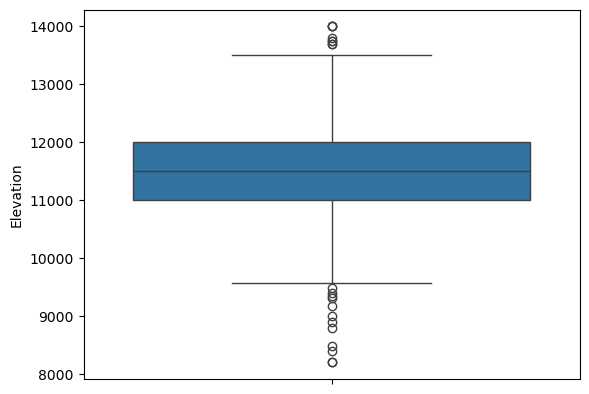

In [54]:
sns.boxplot(avalanche_df, y = 'Elevation')

In [ ]:
#It appears the majority of avalanche accidents occur between 11,000 and 12,000 ft which makes sense, that is the majority of the peak elevations 
#within colorado.

In [46]:
#Let me find the < 2000ft outlier. Colorado is generally a minimum of 5280ft so 1700ft doesn't make sense.
avalanche_df['Elevation'].min()

1700.0

In [50]:
#Lets drop that row
avalanche_df = avalanche_df.drop(avalanche_df['Elevation'].idxmin())

In [51]:
#Now check our minimum
avalanche_df['Elevation'].min()

8200.0

In [ ]:
#That seems more inline with avalanche elevations

In [39]:
#I found Elevation API that can extract Elevation from latitude and longitude. I'm going to try to use it:

import requests

def get_elevation(lat, lon):
    url = 'https://api.open-elevation.com/api/v1/lookup'
    params = {'locations': f'{lat},{lon}'}
    response = requests.get(url, params=params).json()
    elevation_meters = response['results'][0]['elevation']
    return elevation_meters * 3.28084

In [41]:
#Lets test it against an elevation we know. I will use row 1. 
get_elevation(39.682316, -105.930845)

11630.5778

In [42]:
#It gave us an elevation of 11,630 and our target elevation was 11,600!
#lets run it again on another test point to check it
get_elevation(38.008880, -107.873070)

11994.75104

In [ ]:
#Not quite as accurate, it should have been 11,400ft. The free API may not have the highest resolution but it is relatively close
#and is also a free api. For the sake of this project is should work.

In [61]:
#Lets make a function to fill the 52 missing elevation values. I hope this works with their API
def fill_elevation(row):
    if np.isnan(row['Elevation']):
        return get_elevation(row['Latitude'], row['Longitude'])
    else:
        return row['Elevation']

avalanche_df['Elevation'] = avalanche_df.apply(fill_elevation, axis = 1)
        

In [67]:
#It looks like it worked, it filled in the missing values
avalanche_df.head()

,Date,Latitude,Longitude,Avalanche Type,Aspect,Elevation,Slope Degree
0,2/20/2018 7:00,38.008880,-107.873070,HS,N,11400.00000,NaN
1,12/19/2024 19:00,39.682316,-105.930845,NaN,W,11600.00000,NaN
2,1/22/2012 19:00,40.506490,-105.886230,NaN,NaN,10134.51476,NaN
3,1/22/2012 7:00,39.886920,-105.760660,NaN,N,10400.00000,NaN
4,1/14/2018 19:00,38.689060,-106.355380,SS,NE,11200.00000,35.0


<Axes: >

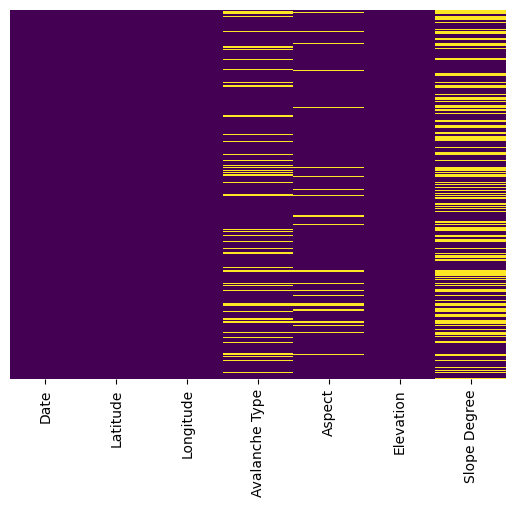

In [64]:
#Lets check
sns.heatmap(avalanche_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<Axes: ylabel='Elevation'>

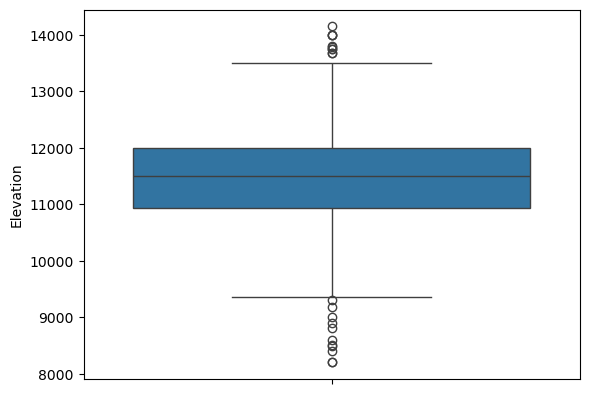

In [65]:
#And then lets check that it actually filled them in and kept our distribution
sns.boxplot(avalanche_df, y = 'Elevation')

In [69]:
#Great, now the last thing to do with the elevation column is set it's data type to integer
avalanche_df['Elevation'] = avalanche_df['Elevation'].astype(int)

In [76]:
avalanche_df['Slope Degree'].isna().sum()

115